# **FIFA 2026 Winner Prediction Model using Python**

---

### **Importing Necessary Libraries**

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_csv("international_matches.csv")
newdf = df.fillna(0)

In [ ]:
df.shape    # (r,c)

(23921, 25)

### **Reshaping Data**

In [ ]:
newdf = newdf.replace({"IR Iran": "Iran", "Costarica": "Costa Rica", "Korea Republic": "South Korea"})

In [ ]:
newdf

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,0.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,0.0,75.2,75.0,77.5,70.8,72.3,74.0


In [ ]:
fifa_rank = newdf[['date', 'home_team', 'away_team', 'home_team_fifa_rank','away_team_fifa_rank',
                   'home_team_total_fifa_points', 'away_team_total_fifa_points']]

home = fifa_rank[['date', 'home_team', 'home_team_fifa_rank', 'home_team_total_fifa_points']].rename(columns = {'home_team' : 'team',
                                                                                                                'home_team_fifa_rank' : 'rank',
                                                                                                                'home_team_total_fifa_points' : 'rank_points'})
away = fifa_rank[['date', 'away_team', 'away_team_fifa_rank', 'away_team_total_fifa_points']].rename(columns = {'away_team' : 'team',
                                                                                                                'away_team_fifa_rank' : 'rank',
                                                                                                                'away_team_total_fifa_points' : 'rank_points'})
fifa_rank = home.append(away)

fifa_rank = fifa_rank.sort_values(['team','date'], ascending = [True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number', axis=1).nsmallest(10, 'rank')

fifa_rank_top

,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [ ]:
columns_contains_null = [col for col in newdf.columns if newdf[col].isnull().any()]
print(f'columns contain null values : {columns_contains_null}')

columns contain null values : []


In [ ]:
newdf["date"] = pd.to_datetime(newdf["date"])

In [ ]:
# list of qualified contries for the 2022 FIFA World Cup
# assuming these countries will be playing in the 2026 World Cup
wc_2022 = ['Qatar', 'Ecudar', 'Sengal', 'Netherlands',
           'England', 'Iran', 'USA', 'Wales',
           'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
           'France','Australia', 'Denmark', 'Tunisia',
           'Spain', 'Costa rica', 'Germany', 'Japan',
           'Croatia', 'Canada', 'Morocco', 'Brazil',
           'Serbia', 'Switzerland', 'Cameroon', 'Portugal',
           'Ghana', 'Uruguay', 'South Korea', 'Belgium' ]

### **Pre Analysis**

#### **Home Team Advantage**

In [ ]:
hometeam = newdf[['country', 'home_team_score', 'away_team_score']]
hometeam.head()

,country,home_team_score,away_team_score
0,Bolivia,3,1
1,Brazil,1,1
2,Ecuador,5,0
3,Guinea,1,0
4,Paraguay,1,3


In [ ]:
# home team wins
hometeam ['home_team_score']> hometeam ['away_team_score']
home_wins = hometeam.loc[hometeam['home_team_score']> hometeam['away_team_score']]
home_wins.head()

,country,home_team_score,away_team_score
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0


In [ ]:
# home team losses
hometeam['home_team_score']<hometeam['away_team_score']
home_loss = hometeam.loc[hometeam['home_team_score']<hometeam['away_team_score']]
home_loss.head()

,country,home_team_score,away_team_score
4,Paraguay,1,3
5,Peru,0,1
8,Faroe Islands,0,7
9,Sweden,1,2
26,Iceland,0,1


In [ ]:
# merge
home_ad = home_wins[['country',
                     'home_team_score',
                     'away_team_score']]. rename(columns = {'home_team_score' : 'Home_team_win',
                                                            'away_team_score' : 'Home_team_loss'})
away_ad = home_loss[['country',
                     'home_team_score',
                     'away_team_score']]. rename(columns = {'home_team_score' : 'Home_team_win',
                                                            'away_team_score' : 'Home_team_loss'})

home_advantage = home_ad.append(away_ad)
home_advantage.head()

,country,Home_team_win,Home_team_loss
0,Bolivia,3,1
2,Ecuador,5,0
3,Guinea,1,0
6,Zimbabwe,2,0
7,Guinea,4,0


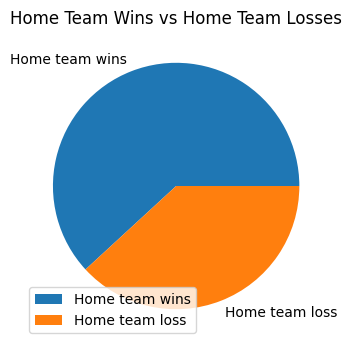

In [ ]:
home_advantage.mean().plot(kind = 'pie',
                           title = "Home Team Wins vs Home Team Losses",
                           labels = ['Home team wins', 'Home team loss'],
                           figsize=(4,4))
plt.legend()

#### **Team with the most number of Wins**

In [ ]:
home_team = newdf[['date', 'home_team', 'home_team_score', 'away_team_score']]
home_team.head(15)

,date,home_team,home_team_score,away_team_score
0,1993-08-08,Bolivia,3,1
1,1993-08-08,Brazil,1,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Paraguay,1,3
5,1993-08-08,Peru,0,1
6,1993-08-08,Zimbabwe,2,0
7,1993-08-09,Guinea,4,0
8,1993-08-11,Faroe Islands,0,7
9,1993-08-11,Sweden,1,2


In [ ]:
home_team['home_team_score']>home_team['away_team_score']
homewins = home_team.loc[hometeam['home_team_score']>home_team['away_team_score']].reset_index(drop=True)

homewins.index=homewins.index+1
homewins.head()

,date,home_team,home_team_score,away_team_score
1,1993-08-08,Bolivia,3,1
2,1993-08-08,Ecuador,5,0
3,1993-08-08,Guinea,1,0
4,1993-08-08,Zimbabwe,2,0
5,1993-08-09,Guinea,4,0


In [ ]:
home_team['home_team_score']<home_team['away_team_score']
homeloss = home_team.loc[home_team['home_team_score']<home_team['away_team_score']].reset_index(drop=True)

homeloss.index=homeloss.index+1
homeloss.head()

,date,home_team,home_team_score,away_team_score
1,1993-08-08,Paraguay,1,3
2,1993-08-08,Peru,0,1
3,1993-08-11,Faroe Islands,0,7
4,1993-08-11,Sweden,1,2
5,1993-08-31,Iceland,0,1


In [ ]:
# merge
hometeam_wins = homewins[['date','home_team', 'home_team_score', 'away_team_score']]. rename(columns = {'home_team': 'Team', 'home_team_score' : 'Home_team_win', 'away_team_score' : 'Away_team_win'})
awayteam_wins = homeloss[['date', 'home_team', 'home_team_score', 'away_team_score']]. rename(columns = {'home_team': 'Team', 'home_team_score' : 'Home_team_win', 'away_team_score' : 'Away_team_win'})
Team_streak = hometeam_wins.append(awayteam_wins)

Team_streak['Total_wins'] = Team_streak['Home_team_win'] + Team_streak['Away_team_win']

# sorted the DataFrame based on the Total_wins column in descending order
Team_streak_sorted = Team_streak.sort_values(by='Total_wins', ascending=False).reset_index(drop=True)

Team_streak_sorted.index = Team_streak_sorted.index + 1
Team_streak_sorted.head()

,date,Team,Home_team_win,Away_team_win,Total_wins
1,2001-04-11,Australia,31,0,31
2,2001-04-09,Australia,22,0,22
3,2005-03-11,Guam,0,21,21
4,2000-11-24,Iran,19,0,19
5,2000-01-26,China PR,19,0,19


In [ ]:
Team_streak['Team'].value_counts().nlargest(1)

USA    253
Name: Team, dtype: int64

#### **Top 10 Teams with the highest Winning Streak**

In [ ]:
dframes = {}
for team in wc_2022:
    df1 = df[(df['home_team'] == team) | (df['away_team'] == team)]
    df1['wins'] = np.where(((df1['home_team'] == team) & (df1['home_team_result'] == 'Win')) | ((df1['away_team'] == team) & (df1['home_team_result'] == 'Lose')), 1, 0)

    name = team + 'streak'
    dframes[name] = df1

streaks = []
for frame in dframes.keys():
    dframes[frame]['start_of_streak'] = dframes[frame]['wins'].ne(dframes[frame]['wins'].shift())
    dframes[frame]['streak_id'] = dframes[frame]['start_of_streak'].cumsum()
    dframes[frame]['streak_counter'] = dframes[frame].groupby('streak_id').cumcount() + 1

    streak = dframes[frame][dframes[frame]['wins'] == 1]['streak_counter'].fillna(0).max()  # Fill NaN with 0
    streaks.append(streak)

Streaks = pd.DataFrame({'Team': wc_2022, 'Streak': streaks}).sort_values('Streak', ascending=False).reset_index(drop=True)
Streaks.index += 1
Streaks.head(10)

,Team,Streak
1,Spain,25.0
2,France,14.0
3,Brazil,14.0
4,Australia,13.0
5,Morocco,12.0
6,Belgium,12.0
7,Saudi Arabia,11.0
8,USA,11.0
9,Netherlands,10.0
10,Switzerland,10.0


Text(0.5, 1.0, 'Top 10 Teams with the highest Winning Streak')

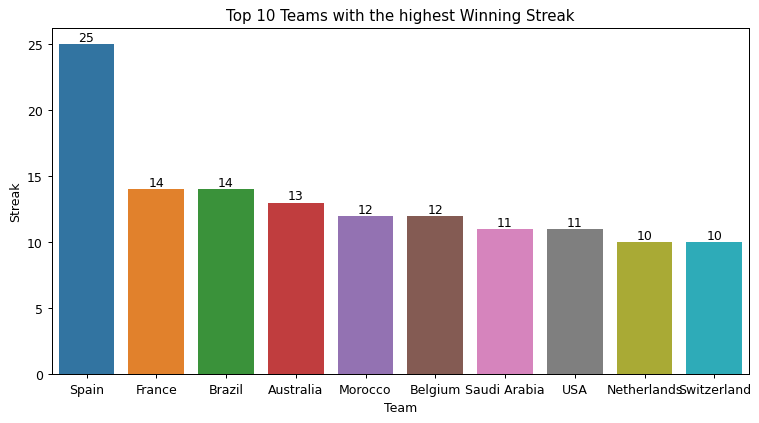

In [ ]:
plt.figure(figsize=(10,5), dpi=90)
ax = sns.barplot(data=Streaks[:10], x='Team', y='Streak')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Streak')
plt.title('Top 10 Teams with the highest Winning Streak')

#### **Team with the Best Goalkeeper, Strongest Defense, Midfield and Offense Score**

In [ ]:
#calculating ranks
ranks = []
for x in wc_2022:
    rank_df = df[(df['home_team'] == x) | (df['away_team'] == x)].sort_values(['date', 'home_team_fifa_rank'], ascending=False).reset_index(drop=True)

    if not rank_df.empty:
        first_match = rank_df.iloc[0]
        if first_match['home_team'] == x:
            rank = first_match['home_team_fifa_rank']
        else:
            rank = first_match['away_team_fifa_rank']
        ranks.append(rank)
    else:
        ranks.append(None)


team_ranks = pd.DataFrame({'Team': wc_2022, 'Rank': ranks})

#rank column to int type and eliminating NaN values
team_ranks['Rank'] = team_ranks['Rank'].fillna(-1).astype(int)

team_ranks = team_ranks[team_ranks['Rank'] >= 0]

team_ranks = team_ranks.sort_values(by='Rank').reset_index(drop=True)
team_ranks.index += 1

team_ranks.head(10)

,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


In [ ]:
#calculating goalkeeper scores for each team to get the team with best goalkeeper
goalkeeper_score = []
for x in wc_2022:
    home_gk_scores = df[df['home_team'] == x]['home_team_goalkeeper_score']
    away_gk_scores = df[df['away_team'] == x]['away_team_goalkeeper_score']

    mean_gk_score = np.nanmean(np.concatenate([home_gk_scores.values, away_gk_scores.values]))

    if np.isnan(mean_gk_score):
        gk_score = -1  # Replace NaN with a placeholder value
    else:
        gk_score = int(np.round(mean_gk_score))

    goalkeeper_score.append(gk_score)

goalkeeper_scores = pd.DataFrame({'Team': wc_2022, 'Goalkeeper Score': goalkeeper_score}).sort_values('Goalkeeper Score', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1

goalkeeper_scores.head(10)


,Team,Goalkeeper Score
1,Spain,89
2,Germany,89
3,France,87
4,Brazil,86
5,Netherlands,83
6,England,83
7,Poland,82
8,Portugal,82
9,Belgium,82
10,Argentina,81


Text(0.5, 1.0, 'Top 10 Goalkeeper Scores')

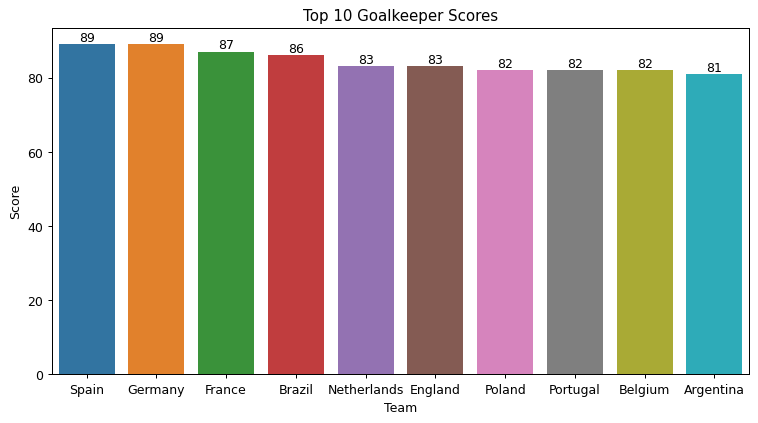

In [ ]:
plt.figure(figsize = (10,5), dpi=90)

ax = sns.barplot(data=goalkeeper_scores[:10], x='Team', y='Goalkeeper Score')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Goalkeeper Scores')

In [ ]:
#calculating defense scores for each team to get the team with strongest defense
defense_score = []
for x in wc_2022:
    home_defense_scores = df[df['home_team'] == x]['home_team_mean_defense_score']
    away_defense_scores = df[df['away_team'] == x]['away_team_mean_defense_score']

    mean_defense_score = np.nanmean(np.concatenate([home_defense_scores.values, away_defense_scores.values]))

    if np.isnan(mean_defense_score):
        df_score = -1  # Replace NaN with a placeholder value
    else:
        df_score = int(np.round(mean_defense_score))

    defense_score.append(df_score)

defense_scores = pd.DataFrame({'Team': wc_2022, 'Defense_Score': defense_score}).sort_values('Defense_Score', ascending=False).reset_index(drop=True)
defense_scores.index += 1

defense_scores.head(10)

,Team,Defense_Score
1,Spain,86
2,Brazil,86
3,England,85
4,Germany,85
5,France,84
6,Argentina,83
7,Portugal,83
8,Belgium,81
9,Netherlands,81
10,Uruguay,80


Text(0.5, 1.0, 'Top 10 Teams with Strongest Defense')

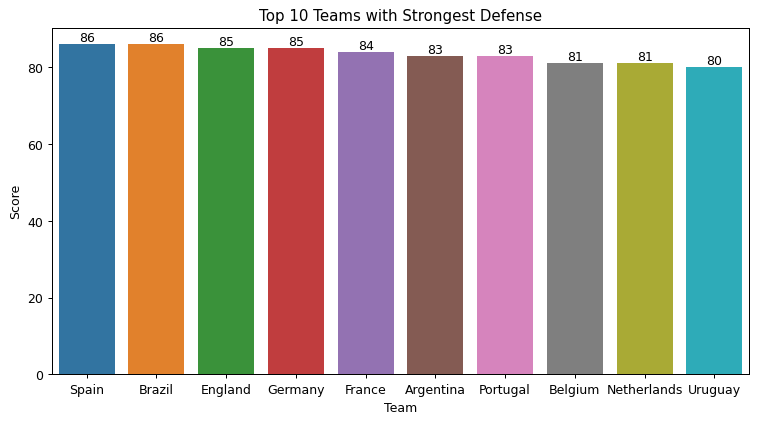

In [ ]:
plt.figure(figsize = (10,5), dpi=90)

ax = sns.barplot(data=defense_scores[:10], x='Team', y='Defense_Score')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Teams with Strongest Defense')

In [ ]:
#calculating offense scores for each team to get the team with strongest offense
offense_score = []
for x in wc_2022:
    home_offense_scores = df[df['home_team'] == x]['home_team_mean_offense_score']
    away_offense_scores = df[df['away_team'] == x]['away_team_mean_offense_score']

    mean_offense_score = np.nanmean(np.concatenate([home_offense_scores.values, away_offense_scores.values]))

    if np.isnan(mean_offense_score):
        df_score = -1  # Replace NaN with a placeholder value
    else:
        df_score = int(np.round(mean_offense_score))

    offense_score.append(df_score)

offense_scores = pd.DataFrame({'Team': wc_2022, 'Attack_Strength': offense_score}).sort_values('Attack_Strength', ascending=False).reset_index(drop=True)
offense_scores.index += 1

offense_scores.head(10)

,Team,Attack_Strength
1,Argentina,88
2,Brazil,87
3,Spain,86
4,France,86
5,Netherlands,85
6,England,85
7,Portugal,85
8,Uruguay,84
9,Germany,84
10,Belgium,82


Text(0.5, 1.0, 'Top 10 Teams with Highest Attack Strength')

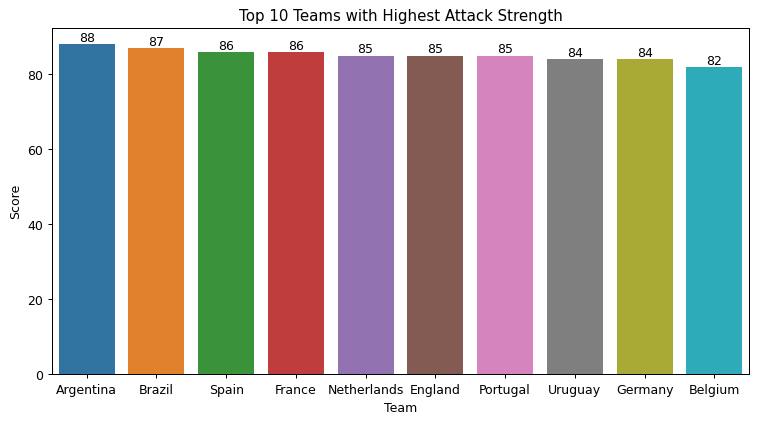

In [ ]:
plt.figure(figsize = (10,5), dpi=90)

ax = sns.barplot(data=offense_scores[:10], x='Team', y='Attack_Strength')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Teams with Highest Attack Strength')

In [ ]:
#calculating midfield scores for each team to get the team with strongest midfield
midfield_score = []
for x in wc_2022:
    home_midfield_scores = df[df['home_team'] == x]['home_team_mean_midfield_score']
    away_midfield_scores = df[df['away_team'] == x]['away_team_mean_midfield_score']

    mean_midfield_score = np.nanmean(np.concatenate([home_midfield_scores.values, away_midfield_scores.values]))

    if np.isnan(mean_midfield_score):
        df_score = -1  # Replace NaN with a placeholder value
    else:
        df_score = int(np.round(mean_midfield_score))

    midfield_score.append(df_score)

midfield_scores = pd.DataFrame({'Team': wc_2022, 'Midfield_Score': midfield_score}).sort_values('Midfield_Score', ascending=False).reset_index(drop=True)
midfield_scores.index += 1

midfield_scores.head(10)

,Team,Midfield_Score
1,Spain,87
2,Germany,86
3,France,86
4,England,85
5,Brazil,85
6,Argentina,84
7,Portugal,84
8,Netherlands,84
9,Belgium,82
10,Croatia,81


Text(0.5, 1.0, 'Top 10 Teams with Highest Midfield Scores')

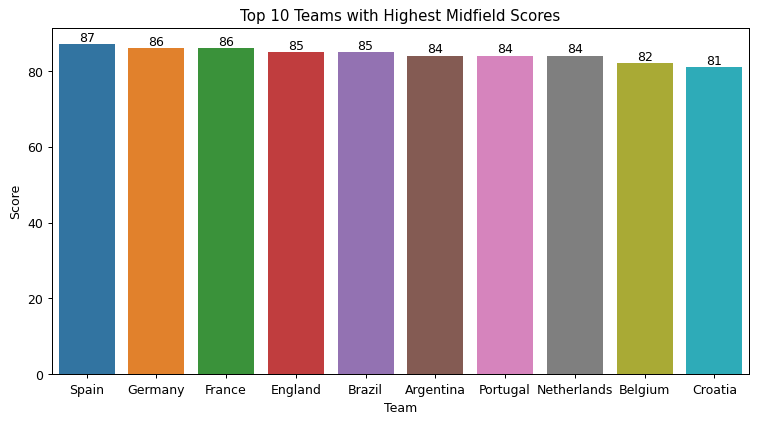

In [ ]:
plt.figure(figsize = (10,5), dpi=90)

ax = sns.barplot(data=midfield_scores[:10], x='Team', y='Midfield_Score')
ax.bar_label(ax.containers[0])
plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Teams with Highest Midfield Scores')

#### **Top 15 Teams who have the Highest chances of winning**

In [ ]:
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []
for team in wc_2022:
  home_win=df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
  home_draw=df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
  home_lose=df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]

  away_win=df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
  away_draw=df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
  away_lose=df[df['away_team']==team][df['home_team_result']=='Win'].shape[0]

  hwins.append(home_win)
  hdraws.append(home_draw)
  hloses.append(home_lose)

  awins.append(away_win)
  adraws.append(away_draw)
  aloses.append(away_lose)

  wins = np.add(hwins,awins)
  draws = np.add(hdraws,adraws)
  loses = np.add(hloses,aloses)

In [ ]:
win_draw_lose = pd.DataFrame({'Team':wc_2022, 'Win':wins, 'Draw': draws, 'Lose': loses,
                              'Home Win': hwins, 'Home Draw': hdraws, 'Home Lose': hloses,
                              'Away Win': awins, 'Away Draw': adraws, 'Away Lose': aloses})
win_draw_lose.insert(1, 'Total', win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home Win']+win_draw_lose['Home Draw']+win_draw_lose['Home Lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away Win']+win_draw_lose['Away Draw']+win_draw_lose['Away Lose'])

win_draw_lose['Win %'] = np.around(100*win_draw_lose['Win']/win_draw_lose['Total'], 2)
win_draw_lose['Draw %'] = np.around(100*win_draw_lose['Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.around(100*win_draw_lose['Lose']/win_draw_lose['Total'], 2)

win_draw_lose['Home Win %'] = np.around(100*win_draw_lose['Home Win']/win_draw_lose['Total'], 2)
win_draw_lose['Home Draw %'] = np.around(100*win_draw_lose['Home Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Home Lose %'] = np.around(100*win_draw_lose['Home Lose']/win_draw_lose['Total'], 2)

win_draw_lose['Away Win %'] = np.around(100*win_draw_lose['Away Win']/win_draw_lose['Total'], 2)
win_draw_lose['Away Draw %'] = np.around(100*win_draw_lose['Away Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Away Lose %'] = np.around(100*win_draw_lose['Away Lose']/win_draw_lose['Total'], 2)

win_draw_lose=win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index+=1

win_draw_lose.head()

,Team,Total,Win,Draw,Lose,Home Win,Home Draw,Home Lose,Total Home,Away Win,...,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,...,200,69.52,17.55,12.93,41.80,7.16,4.85,27.71,10.39,8.08
2,Spain,354,246,64,44,145,27,17,189,101,...,165,69.49,18.08,12.43,40.96,7.63,4.80,28.53,10.45,7.63
3,France,370,230,83,57,145,44,32,221,85,...,149,62.16,22.43,15.41,39.19,11.89,8.65,22.97,10.54,6.76
4,Germany,390,240,82,68,139,44,36,219,101,...,171,61.54,21.03,17.44,35.64,11.28,9.23,25.90,9.74,8.21
5,Netherlands,340,201,74,65,119,40,33,192,82,...,148,59.12,21.76,19.12,35.00,11.76,9.71,24.12,10.00,9.41


Text(0.5, 1.0, 'Top 15 countries with the Highest Chances of Winning')

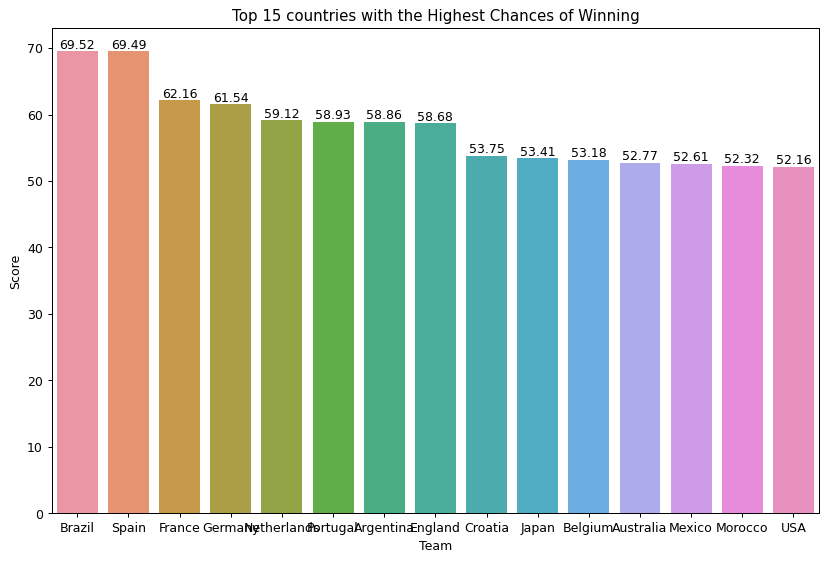

In [ ]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data = win_draw_lose[:15], x='Team', y='Win %')
ax.bar_label(ax.containers[0])
plt.xlabel("Team")
plt.ylabel("Score")
plt.title("Top 15 countries with the Highest Chances of Winning")

### **Predicting the Winner**

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import figure
import seaborn as sns
import datetime

from itertools import product, combinations
from collections import Counter

import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=10000)
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
df["home_won"] = (df["home_team_score"] - df["away_team_score"]) > 0
df["total_score_home_team"] = (0.118451*newdf["home_team_goalkeeper_score"] + 0.127435*newdf["home_team_mean_defense_score"] + 0.121533*newdf["home_team_mean_midfield_score"] + 0.129956*newdf["home_team_mean_offense_score"])/(0.118451 + 0.127435 + 0.121533 + 0.129956)
df["total_score_away_team"] = (0.170633*newdf["away_team_goalkeeper_score"] + 0.186455*newdf["away_team_mean_defense_score"] + 0.183241*newdf["away_team_mean_midfield_score"] + 0.190876*newdf["away_team_mean_offense_score"])/(0.170633 + 0.186455 + 0.183241 + 0.190876)
df["point_diff"] = df["home_team_total_fifa_points"] - df["away_team_total_fifa_points"]
df["team_diff"] = df["total_score_home_team"] - df["total_score_away_team"]
df["rank_diff"] = df["home_team_fifa_rank"] - df["away_team_fifa_rank"]
df["avg_rank_diff"] = (df["home_team_fifa_rank"]+df["away_team_fifa_rank"])/2

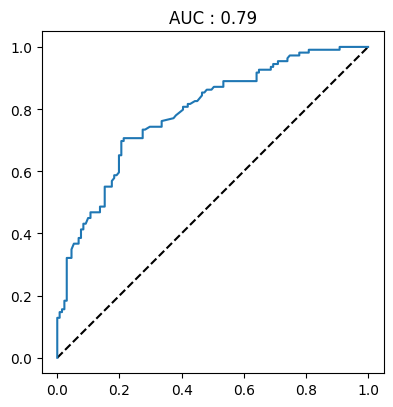

In [ ]:
#X, y = df.loc[:,["team_diff","avg_rank_diff","rank_diff", "point_diff"]], df["home_won"]
X, y = df.loc[:,["rank_diff", "point_diff"]], df["home_won"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

logreg = linear_model.LogisticRegression(C = 1e-5)
features = PolynomialFeatures(degree = 2)
model = Pipeline([("polynomial_features", features),("logistic_regression", logreg)])
model = model.fit(X_train, y_train)

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title("AUC : {0:0.2}" .format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)


In [ ]:
matches = pd.read_csv("Groupes - V3.csv")
matches = matches.loc[:, ["team", "groups", "First match against", "Second match against", "Third match against"]]
matches = matches.set_index("team")
matches.head()

,groups,First match against,Second match against,Third match against
team,,,,
Qatar,A,Ecuador,Senegal,Netherlands
Ecuador,A,Qatar,Netherlands,Senegal
Senegal,A,Netherlands,Qatar,Ecuador
Netherlands,A,Senegal,Ecuador,Qatar
England,B,Iran,USA,Wales


In [ ]:
teams = ["Qatar", "Ecuador", "Senegal", "Netherlands", "England", "Iran", "USA", "Wales", "Argentina", "Saudi Arabia", "Mexico", "Poland", "France", "Australia", "Denmark", "Tunisia", "Spain", "Costa Rica", "Germany", "Japan", "Belgium", "Canada", "Morocco", "Croatia", "Brazil", "Serbia", "Switzerland", "Cameroon", "Portugal", "Ghana", "Uruguay", "South Korea"]

world_cup_rankings_home = newdf[["home_team","home_team_fifa_rank","home_team_total_fifa_points"]].loc[newdf["home_team"].isin(teams) & (newdf["date"]>"2021-01-01")]
world_cup_rankings_away = newdf[["away_team","away_team_fifa_rank","away_team_total_fifa_points"]].loc[newdf["away_team"].isin(teams) & (newdf["date"]>"2021-01-01")]

world_cup_rankings_home = world_cup_rankings_home.groupby("home_team").mean()
world_cup_rankings_away = world_cup_rankings_away.groupby("away_team").mean()

In [ ]:
round_of_16 = list()
quarterfinals = list()
semifinals = list()
finals = list()

results_round_of_16 = list()
results_quarterfinals = list()
results_semifinals = list()
results_finals = list()

simulations = 100

for i in range(simulations):
    matches["total_prob"] = 0
    matches["points"] = 0
    try:
        matches.set_index('team',inplace=True)
    except:
        pass

    for groups in set(matches["groups"]):
        lista_combinacoes = list(combinations(matches.query('groups == "{}"'.format(groups)).index, 2))
        for home, away in lista_combinacoes:
            home_p = home
            away_p = away

            #row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
            row = pd.DataFrame(np.array([[np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home_p, "home_team_fifa_rank"]
            home_points = world_cup_rankings_home.loc[home_p, "home_team_total_fifa_points"]
            away_rank = world_cup_rankings_away.loc[away_p, "away_team_fifa_rank"]
            away_points = world_cup_rankings_away.loc[away_p, "away_team_total_fifa_points"]

            #row["avg_rank_diff"] = (home_rank + away_rank)/2
            row["rank_diff"] = home_rank - away_rank
            row["point_diff"] = home_points - away_points

            home_win_prob = model.predict_proba(row)[:,1][0]
            home_win_prob = np.random.binomial(1, home_win_prob)

            matches.loc[home_p, "total_prob"] = matches.loc[home_p, "total_prob"] + home_win_prob
            matches.loc[away_p, "total_prob"] = matches.loc[away_p, "total_prob"] + (1-home_win_prob)

            points = 0
            if home_win_prob < 0.5:
                matches.loc[away_p, "points"] = matches.loc[away_p, "points"] + 3
            if home_win_prob == 0.5:
                matches.loc[home_p, "points"] = matches.loc[home_p, "points"] + 1
                matches.loc[away_p, "points"] = matches.loc[away_p, "points"] + 1
            if home_win_prob > 0.5:
                points = 3
                matches.loc[home_p, "points"] = matches.loc[home_p, "points"] + 3

    matches = matches.sort_values(by=["groups", "points", "total_prob"], ascending=False).reset_index()
    playoffs = matches.groupby("groups").nth([0,1])
    order = [0,3,1,2,4,7,5,6,8,11,9,10,12,15,13,14]

    playoffs = playoffs.iloc[order]
    playoffs = playoffs.set_index('team')

    rounds = ["round_of_16", "quarterfinals", "semifinals", "finals"]

    for j in rounds:
        iterations = int(len(playoffs)/2)
        winners = []
        probability = []

        for k in range(iterations):
            home_q = playoffs.index[k*2]
            away_q = playoffs.index[k*2+1]

            #row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
            row = pd.DataFrame(np.array([[np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home_q, "home_team_fifa_rank"]
            home_points = world_cup_rankings_home.loc[home_q, "home_team_total_fifa_points"]
            away_rank = world_cup_rankings_away.loc[away_q, "away_team_fifa_rank"]
            away_points = world_cup_rankings_away.loc[away_q, "away_team_total_fifa_points"]

            #row["avg_rank_diff"] = (home_rank + away_rank)/2
            row["rank_diff"] = home_rank - away_rank
            row["point_diff"] = home_points - away_points

            home_win_prob = model.predict_proba(row)[:,1][0]
            home_win_prob = np.random.binomial(1, home_win_prob)
            #print(f'{j}>>>{home_win_prob}')

            if home_win_prob < 0.5:
                winners.append(away_q)
                probability.append(1-home_win_prob)
            if home_win_prob >= 0.5:
                winners.append(home_q)
                probability.append(home_win_prob)

        if j == "round_of_16":
            step_16 = ["round_of_16"] * 8
            candidates_round_of_16 = zip(step_16, winners, probability)
            round_of_16.append(pd.DataFrame(candidates_round_of_16, columns = ["Step","Team","Prob"]))
            results_round_of_16.append(winners)

        if j == "quarterfinals":
            step_quarterfinal = ["quarterfinals"] * 4
            candidates_quarterfinal = zip(step_quarterfinal,winners, probability)
            quarterfinals.append(pd.DataFrame(candidates_quarterfinal, columns = ["Step","Team","Prob"]))
            results_quarterfinals.append(winners)

        if j == "semifinals":
            step_semifinal = ["semifinals"] * 2
            candidates_semifinal = zip(step_semifinal,winners, probability)
            semifinals.append(pd.DataFrame(candidates_semifinal, columns = ["Step","Team","Prob"]))
            results_semifinals.append(winners)

        if j == "finals":
            step_final = ["finals"]
            candidates_final = zip(step_final,winners, probability)
            finals.append(pd.DataFrame(candidates_final, columns = ["Step","Team","Prob"]))
            results_finals.append(winners)

        playoffs = playoffs.filter(items=winners, axis=0)

candidates_round_of_16 = pd.concat(round_of_16)
candidates_quarterfinals = pd.concat(quarterfinals)
candidates_semifinals = pd.concat(semifinals)
candidates_finals = pd.concat(finals)

results_candidates = pd.concat(
    [candidates_round_of_16,
    candidates_quarterfinals,
    candidates_semifinals,
    candidates_finals]
)

results_round_of_16 = sum(results_round_of_16, [])
results_quarterfinals = sum(results_quarterfinals, [])
results_semifinals = sum(results_semifinals, [])
results_finals = sum(results_finals,[])

results_real = [results_round_of_16, results_quarterfinals, results_semifinals, results_finals]

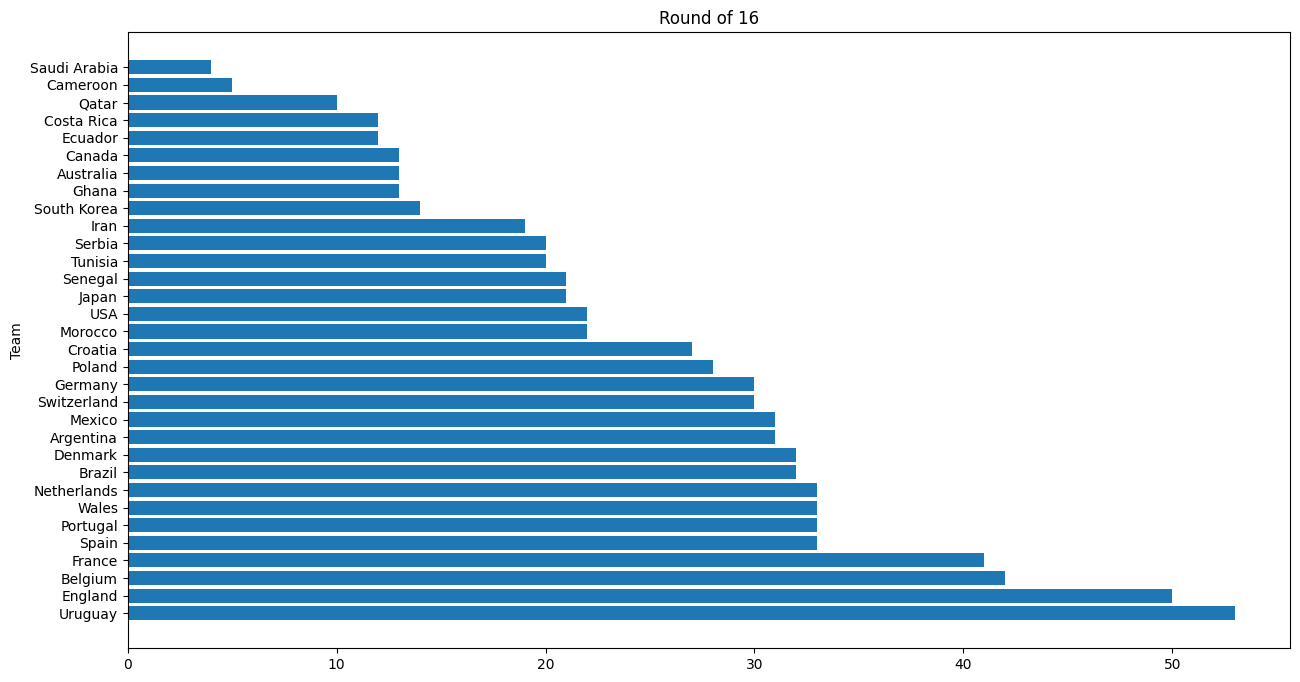

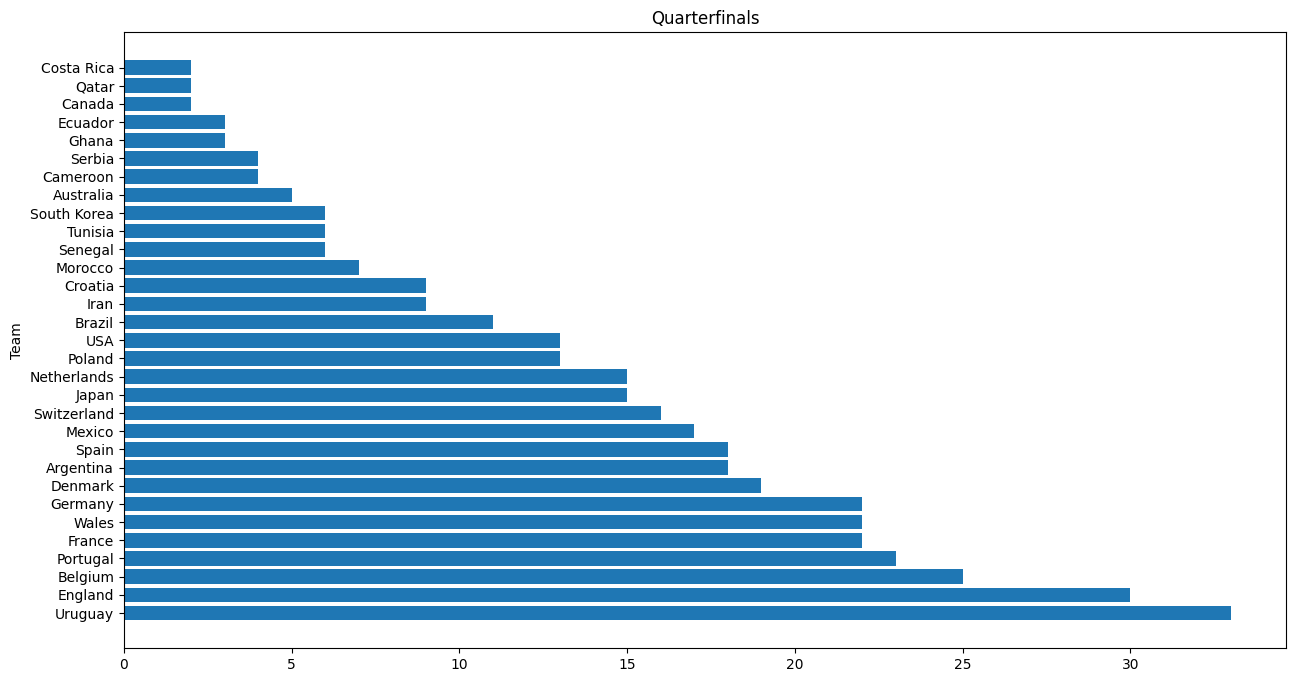

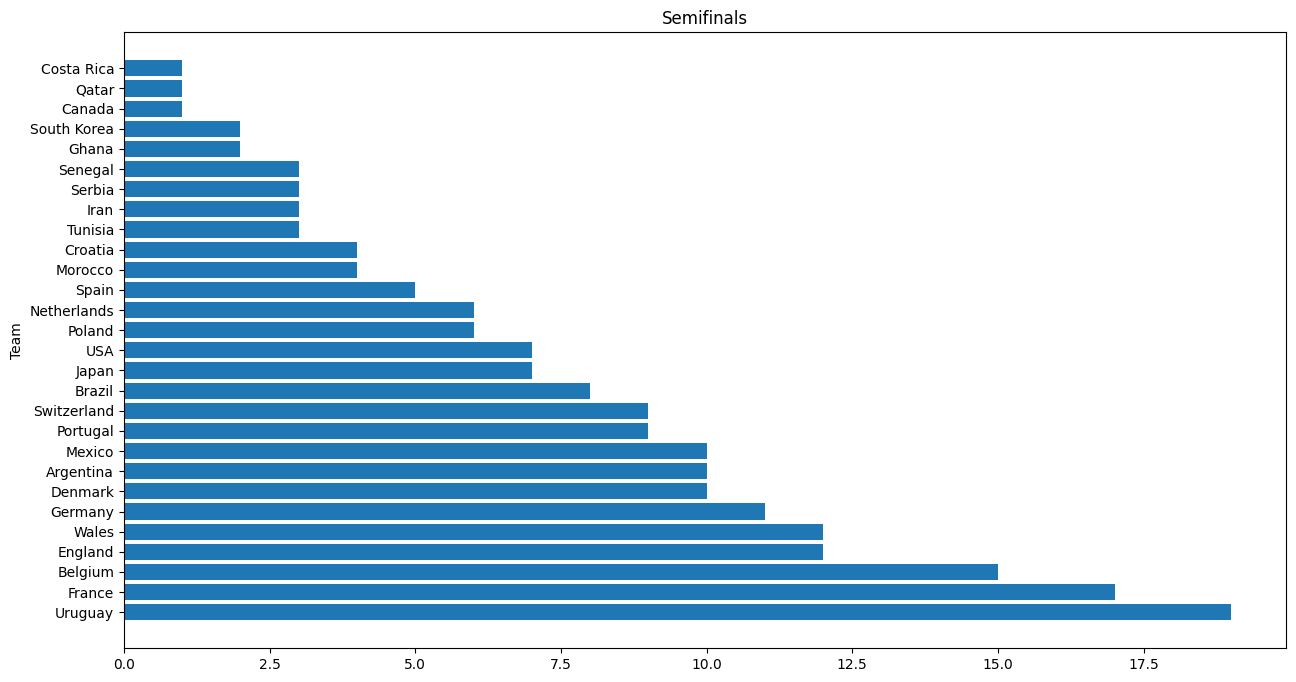

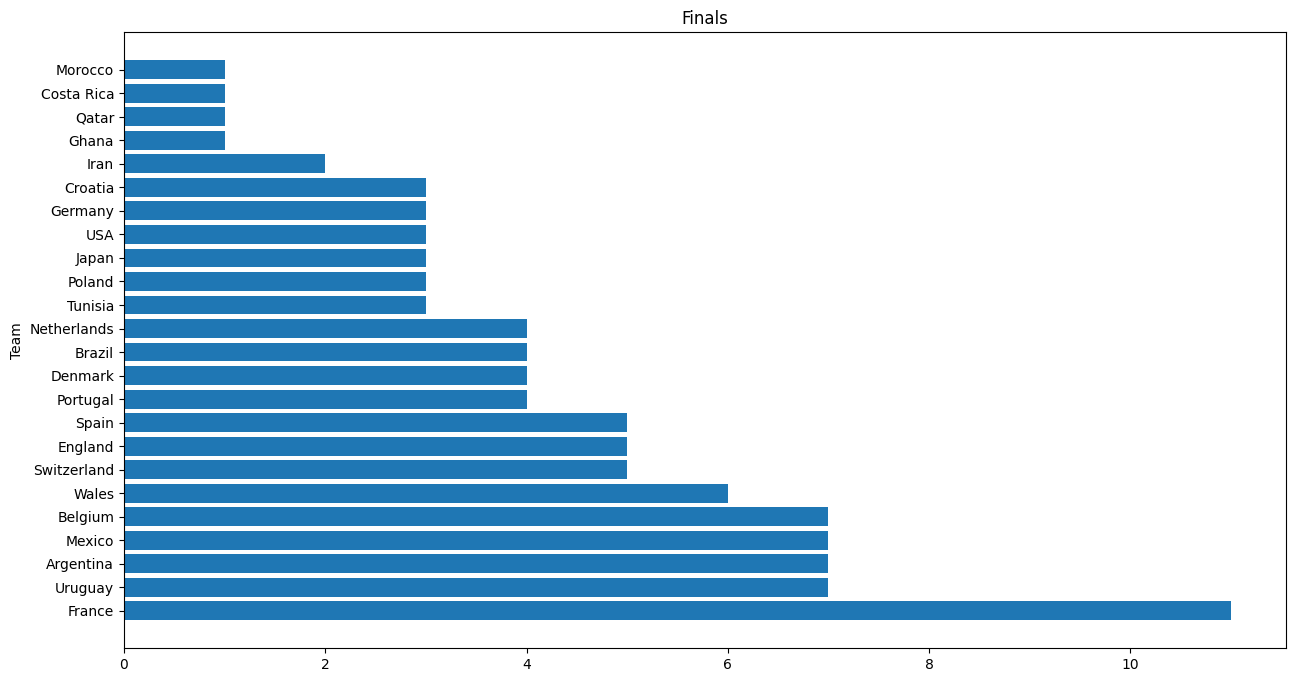

In [ ]:
for i in results_real:
    results = Counter(i).most_common()
    x,y = zip(*results)

    fig,ax = plt.subplots(figsize=(15,8))

    ax.barh(x, y)

    ax.set_ylabel("Team")

    if i == results_round_of_16:
        ax.set_title("Round of 16")
    if i == results_quarterfinals:
        ax.set_title("Quarterfinals")
    if i == results_semifinals:
        ax.set_title("Semifinals")
    if i == results_finals:
        ax.set_title("Finals")

    plt.show()

#### **Accuracy of the Model**

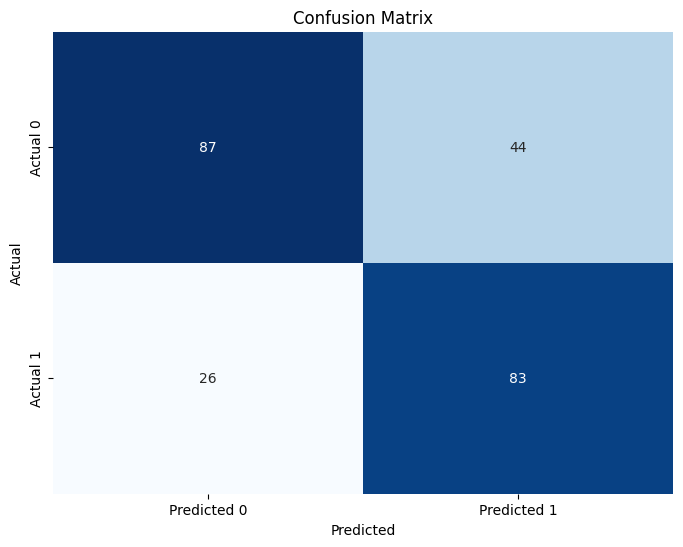

Accuracy: 0.71


In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy:.2f}')